In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def least_squares_fit(x, y, model):
    """
    Perform least squares fitting for a given model function.
    """
    def linear(x, a, b):
        return a * x + b
    
    def power_law(x, a, b):
        return a * np.power(x, b)
    
    def exponential(x, a, b):
        return a * np.exp(b * x)
    
    models = {"linear": linear, "power_law": power_law, "exponential": exponential}
    
    if model not in models:
        raise ValueError("Invalid model. Choose from 'linear', 'power_law', or 'exponential'.")
    
    popt, pcov = opt.curve_fit(models[model], x, y)
    perr = np.sqrt(np.diag(pcov))  # Parameter uncertainties
    
    return popt, perr

def weighted_least_squares_fit(x, y, sigma, model):
    """
    Perform weighted least squares fitting.
    """
    def linear(x, a, b):
        return a * x + b
    
    models = {"linear": linear}
    
    if model not in models:
        raise ValueError("Currently only 'linear' model is implemented for weighted fitting.")
    
    popt, pcov = opt.curve_fit(models[model], x, y, sigma=sigma, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))  # Parameter uncertainties
    
    return popt, perr

# Example Data
x_data = np.array([1, 2, 3, 4, 5, 6])
y_data = np.array([2.2, 2.8, 3.6, 4.5, 5.1, 6.0])
sigma_data = np.array([0.2, 0.2, 0.3, 0.3, 0.4, 0.4])  # Example uncertainties

# Linear Fit
params, uncertainties = least_squares_fit(x_data, y_data, "linear")
print(f"Linear Fit: a = {params[0]:.3f} ± {uncertainties[0]:.3f}, b = {params[1]:.3f} ± {uncertainties[1]:.3f}")

# Power Law Fit
params, uncertainties = least_squares_fit(x_data, y_data, "power_law")
print(f"Power Law Fit: a = {params[0]:.3f} ± {uncertainties[0]:.3f}, b = {params[1]:.3f} ± {uncertainties[1]:.3f}")

# Exponential Fit
params, uncertainties = least_squares_fit(x_data, y_data, "exponential")
print(f"Exponential Fit: a = {params[0]:.3f} ± {uncertainties[0]:.3f}, b = {params[1]:.3f} ± {uncertainties[1]:.3f}")

# Weighted Least Squares Fit (Linear)
w_params, w_uncertainties = weighted_least_squares_fit(x_data, y_data, sigma_data, "linear")
print(f"Weighted Linear Fit: a = {w_params[0]:.3f} ± {w_uncertainties[0]:.3f}, b = {w_params[1]:.3f} ± {w_uncertainties[1]:.3f}")


Linear Fit: a = 0.766 ± 0.022, b = 1.353 ± 0.084
Power Law Fit: a = 1.904 ± 0.138, b = 0.624 ± 0.049
Exponential Fit: a = 1.990 ± 0.121, b = 0.188 ± 0.013
Weighted Linear Fit: a = 0.761 ± 0.070, b = 1.367 ± 0.213


Linear Fit: a = 0.766 ± 0.022, b = 1.353 ± 0.084


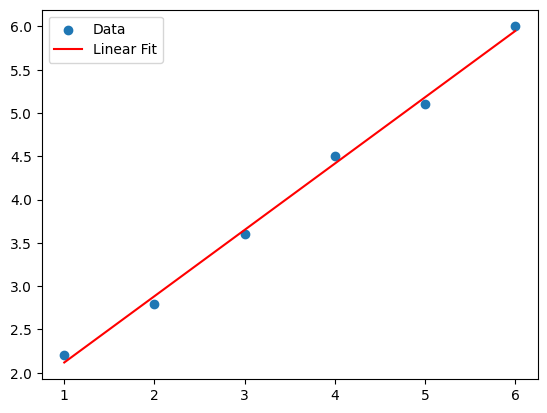

Power Law Fit: a = 1.904 ± 0.138, b = 0.624 ± 0.049


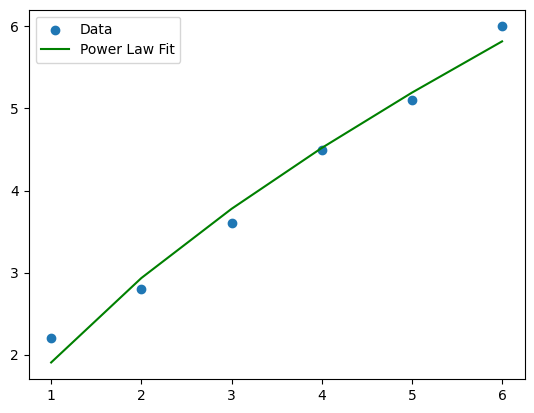

Exponential Fit: a = 1.990 ± 0.121, b = 0.188 ± 0.013


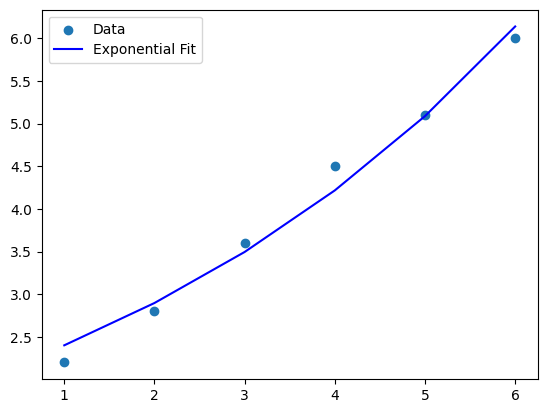

Weighted Linear Fit: a = 0.761 ± 0.070, b = 1.367 ± 0.213


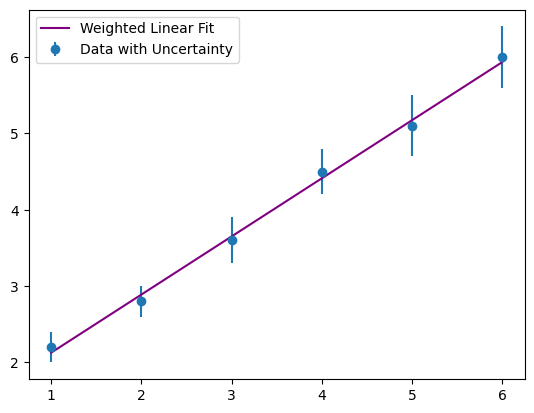

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def least_squares_fit(x, y, model):
    """
    Perform least squares fitting for a given model function.
    """
    def linear(x, a, b):
        return a * x + b
    
    def power_law(x, a, b):
        return a * np.power(x, b)
    
    def exponential(x, a, b):
        return a * np.exp(b * x)
    
    models = {"linear": linear, "power_law": power_law, "exponential": exponential}
    
    if model not in models:
        raise ValueError("Invalid model. Choose from 'linear', 'power_law', or 'exponential'.")
    
    popt, pcov = opt.curve_fit(models[model], x, y)
    perr = np.sqrt(np.diag(pcov))  # Parameter uncertainties
    
    return popt, perr, models[model]

def weighted_least_squares_fit(x, y, sigma, model):
    """
    Perform weighted least squares fitting.
    """
    def linear(x, a, b):
        return a * x + b
    
    models = {"linear": linear}
    
    if model not in models:
        raise ValueError("Currently only 'linear' model is implemented for weighted fitting.")
    
    popt, pcov = opt.curve_fit(models[model], x, y, sigma=sigma, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))  # Parameter uncertainties
    
    return popt, perr, models[model]

# Example Data
x_data = np.array([1, 2, 3, 4, 5, 6])
y_data = np.array([2.2, 2.8, 3.6, 4.5, 5.1, 6.0])
sigma_data = np.array([0.2, 0.2, 0.3, 0.3, 0.4, 0.4])  # Example uncertainties

# Linear Fit
params, uncertainties, model = least_squares_fit(x_data, y_data, "linear")
print(f"Linear Fit: a = {params[0]:.3f} ± {uncertainties[0]:.3f}, b = {params[1]:.3f} ± {uncertainties[1]:.3f}")
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_data, model(x_data, *params), label="Linear Fit", color='red')
plt.legend()
plt.show()

# Power Law Fit
params, uncertainties, model = least_squares_fit(x_data, y_data, "power_law")
print(f"Power Law Fit: a = {params[0]:.3f} ± {uncertainties[0]:.3f}, b = {params[1]:.3f} ± {uncertainties[1]:.3f}")
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_data, model(x_data, *params), label="Power Law Fit", color='green')
plt.legend()
plt.show()

# Exponential Fit
params, uncertainties, model = least_squares_fit(x_data, y_data, "exponential")
print(f"Exponential Fit: a = {params[0]:.3f} ± {uncertainties[0]:.3f}, b = {params[1]:.3f} ± {uncertainties[1]:.3f}")
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_data, model(x_data, *params), label="Exponential Fit", color='blue')
plt.legend()
plt.show()

# Weighted Least Squares Fit (Linear)
w_params, w_uncertainties, model = weighted_least_squares_fit(x_data, y_data, sigma_data, "linear")
print(f"Weighted Linear Fit: a = {w_params[0]:.3f} ± {w_uncertainties[0]:.3f}, b = {w_params[1]:.3f} ± {w_uncertainties[1]:.3f}")
plt.errorbar(x_data, y_data, yerr=sigma_data, fmt='o', label="Data with Uncertainty")
plt.plot(x_data, model(x_data, *w_params), label="Weighted Linear Fit", color='purple')
plt.legend()
plt.show()
